<a href="https://colab.research.google.com/github/tomhyhan/noodles/blob/main/pasta_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import userdata
from google.colab import auth

auth.authenticate_user()
token = userdata.get('token')
username = userdata.get('username')
repo_name = "noodles"

In [3]:
import os

!git clone https://github.com/tomhyhan/{repo_name}.git

if os.getcwd() != f"/content/{repo_name}":
    %cd {repo_name}
!git pull
!pwd


fatal: destination path 'noodles' already exists and is not an empty directory.
/content/noodles
From https://github.com/tomhyhan/noodles
   1ca7020..8d20344  main       -> origin/main
Already up to date.
/content/noodles


In [4]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
import sys

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = "noodles"

GOOGLE_DRIVE_PATH = os.path.join("..", "drive", "My Drive", GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)


In [6]:
from model.utils import test_colab
test_colab()


Hello Colab! from Noodles ha


In [7]:
!pip install torchinfo
!pip install imagehash

In [8]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold


from config.config_manager import ConfigManager
from collections import Counter
from model.data_model import PastaData, create_train_transforms, create_test_transforms
from model.train import trainer, create_model
from model.utils import reset_seed, save_model
from model.data import CLASS_ENCODER, create_csv
from model.viz import class_imbalance, draw_loss, draw_train_val_accuracy

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [9]:
config_manager = ConfigManager("./config/config.yml")

SEED = config_manager.config.seed

In [10]:
reset_seed(SEED)

In [11]:
image_path = os.path.join(GOOGLE_DRIVE_PATH, "images")
csv_file_path = os.path.join(GOOGLE_DRIVE_PATH, "pasta_data.csv")

if not os.path.exists(csv_file_path):
    create_csv(image_path, csv_file_path)

In [12]:
data = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, "./pasta_data.csv"))
image_paths, labels = data["img_path"], data["label"]

X, test_data, y, test_label = train_test_split(image_paths.values, labels.values, train_size=0.9, random_state=SEED, shuffle=True, stratify=labels)

5033 1258


/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Epoch 1/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.936476396968407e-05]
Epoch 1 Loss: 2.5440496675173443 Train Accuracy: 0.6796             Validation Accuracy: 0.6566666666666666
Global gradient norm: 2.0138914810591744


Epoch 2/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.57666351956958e-05]
Epoch 2 Loss: 1.7627746470769246 Train Accuracy: 0.8452666666666667             Validation Accuracy: 0.8
Global gradient norm: 3.2658072190669305


Epoch 3/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [2.8866422562400154e-09]
Epoch 3 Loss: 1.5296727935473124 Train Accuracy: 0.8694             Validation Accuracy: 0.8233333333333334
Global gradient norm: 2.6379442789237353
End of Training for maxvit Model 2-fold
best accuracy: 0.8233333333333334


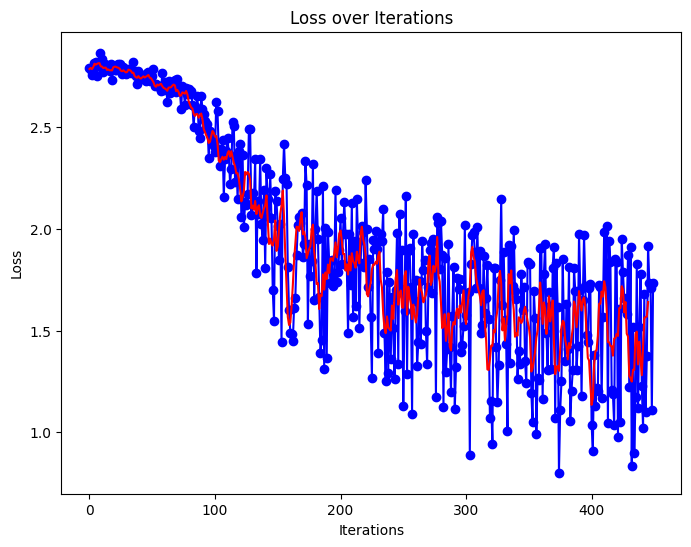

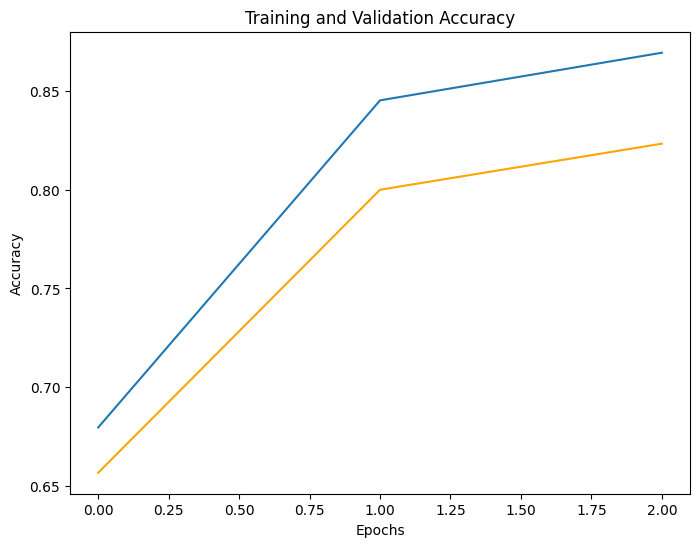

5033 1258


Epoch 1/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.936476396968407e-05]
Epoch 1 Loss: 2.553688448270162 Train Accuracy: 0.6828             Validation Accuracy: 0.6591666666666667
Global gradient norm: 2.7417132052083293


Epoch 2/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.57666351956958e-05]
Epoch 2 Loss: 1.7652489264806113 Train Accuracy: 0.8496             Validation Accuracy: 0.8008333333333333
Global gradient norm: 2.0381433349363967


Epoch 3/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [2.8866422562400154e-09]
Epoch 3 Loss: 1.6424061091740927 Train Accuracy: 0.8684666666666667             Validation Accuracy: 0.8158333333333333
Global gradient norm: 1.8210956792942103
End of Training for maxvit Model 3-fold
best accuracy: 0.8158333333333333


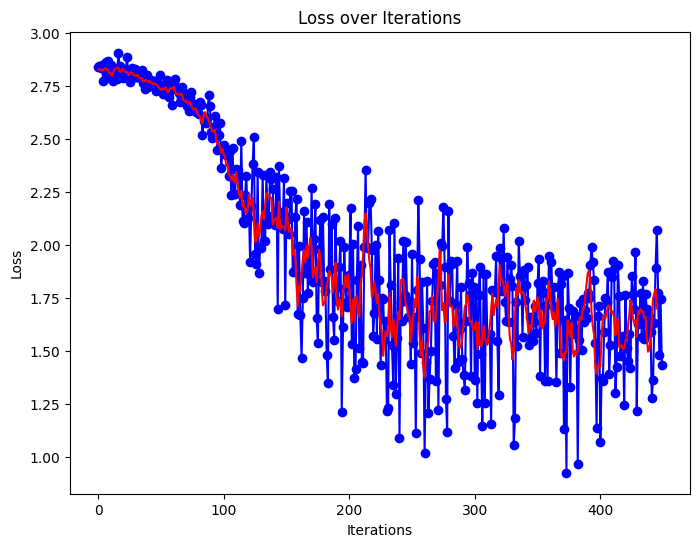

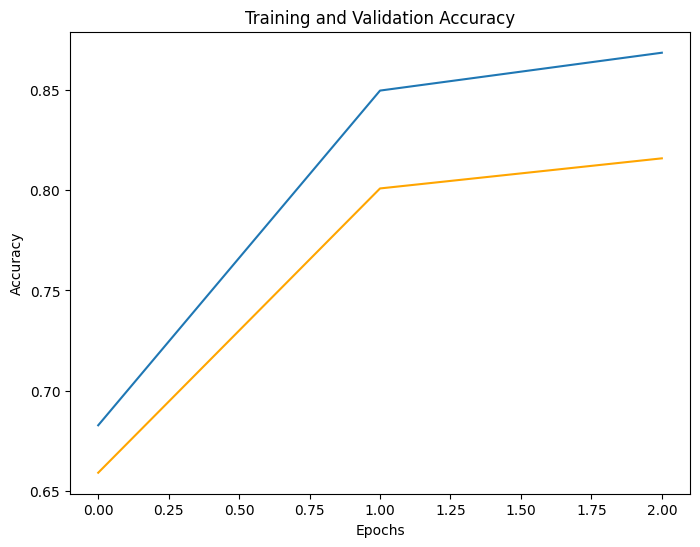

5033 1258


Epoch 1/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.936476396968407e-05]
Epoch 1 Loss: 2.543018021583557 Train Accuracy: 0.6964             Validation Accuracy: 0.655
Global gradient norm: 2.7548865105229683


Epoch 2/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.57666351956958e-05]
Epoch 2 Loss: 1.7630496756235758 Train Accuracy: 0.8492             Validation Accuracy: 0.7991666666666667
Global gradient norm: 3.171248904853253


Epoch 3/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [2.8866422562400154e-09]
Epoch 3 Loss: 1.601429805358251 Train Accuracy: 0.8656666666666667             Validation Accuracy: 0.8108333333333333
Global gradient norm: 3.1539299012618294
End of Training for maxvit Model 4-fold
best accuracy: 0.8108333333333333


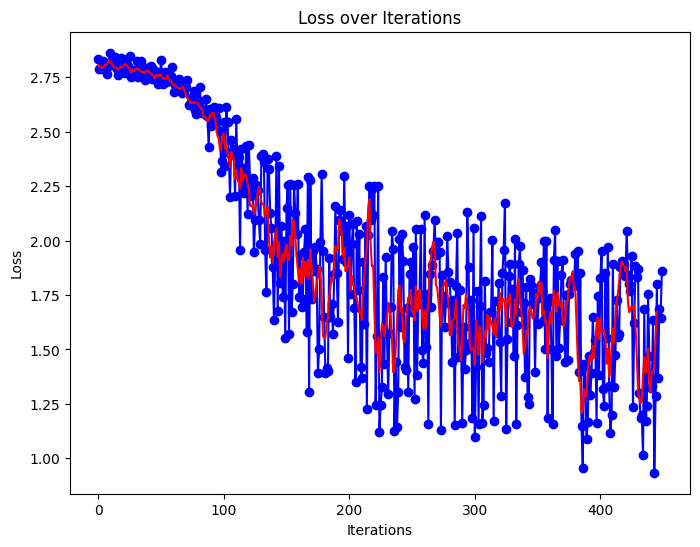

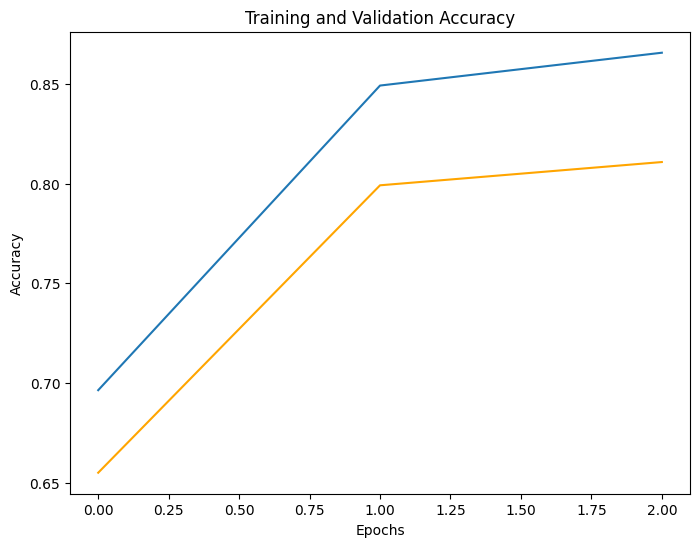

current_model_accuracies [0.8233333333333334, 0.8158333333333333, 0.8108333333333333]
5032 1259
=== ../drive/My Drive/noodles/./swin/swin_k_fold_0.pt exist! ===
Resume Training from previous check point


/content/noodles/model/utils.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(out_file, map_location="cpu")


Epoch 4/6:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.936476396968407e-05]
Epoch 4 Loss: 1.5186367233594258 Train Accuracy: 0.8728666666666667             Validation Accuracy: 0.815
Global gradient norm: 4.0397887272685855


Epoch 5/6:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.57666351956958e-05]
Epoch 5 Loss: 1.4953422741095226 Train Accuracy: 0.9122             Validation Accuracy: 0.8458333333333333
Global gradient norm: 3.6459339505600745


Epoch 6/6:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [2.8866422562400154e-09]
Epoch 6 Loss: 1.3490783882141113 Train Accuracy: 0.9333333333333333             Validation Accuracy: 0.8608333333333333
Global gradient norm: 3.5587228032605838
End of Training for swin Model 0-fold
best accuracy: 0.8608333333333333


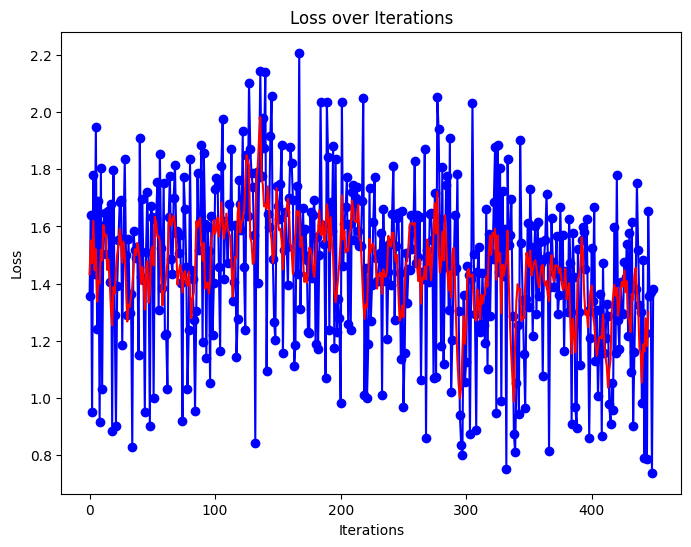

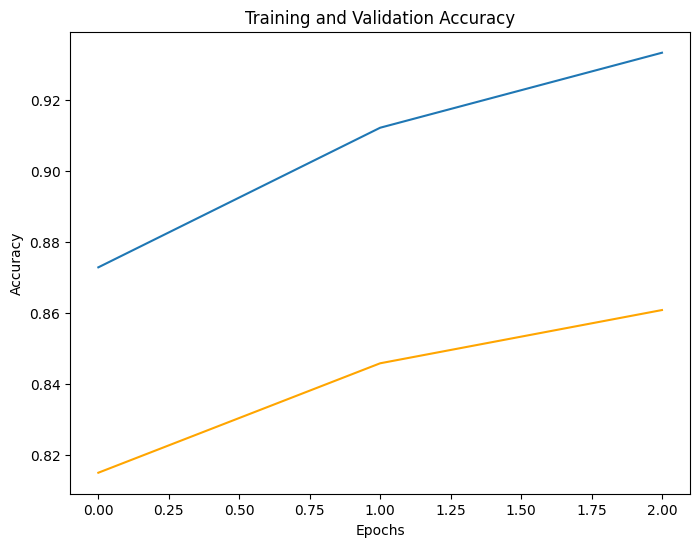

5033 1258


Epoch 1/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.936476396968407e-05]
Epoch 1 Loss: 2.3452301462491354 Train Accuracy: 0.7244             Validation Accuracy: 0.7208333333333333
Global gradient norm: 5.798540862172502


Epoch 2/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.57666351956958e-05]
Epoch 2 Loss: 1.6991208656628927 Train Accuracy: 0.8609333333333333             Validation Accuracy: 0.8283333333333334
Global gradient norm: 3.289503910984397


Epoch 3/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [2.8866422562400154e-09]
Epoch 3 Loss: 1.4818226726849875 Train Accuracy: 0.8950666666666667             Validation Accuracy: 0.85
Global gradient norm: 3.582123537783968
End of Training for swin Model 1-fold
best accuracy: 0.85


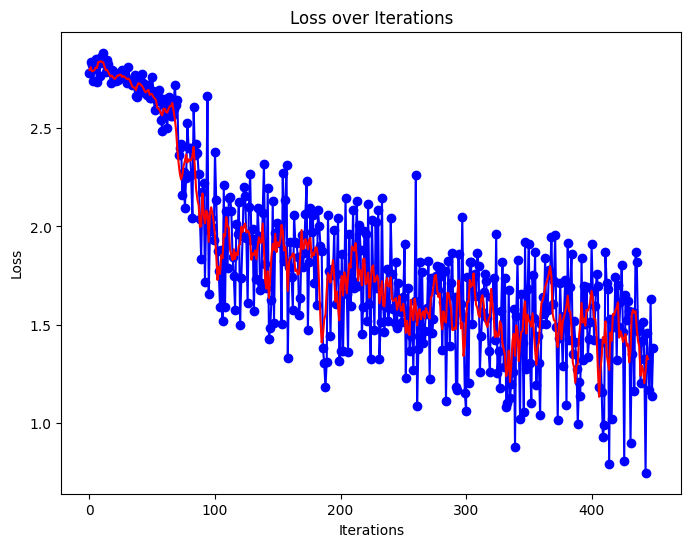

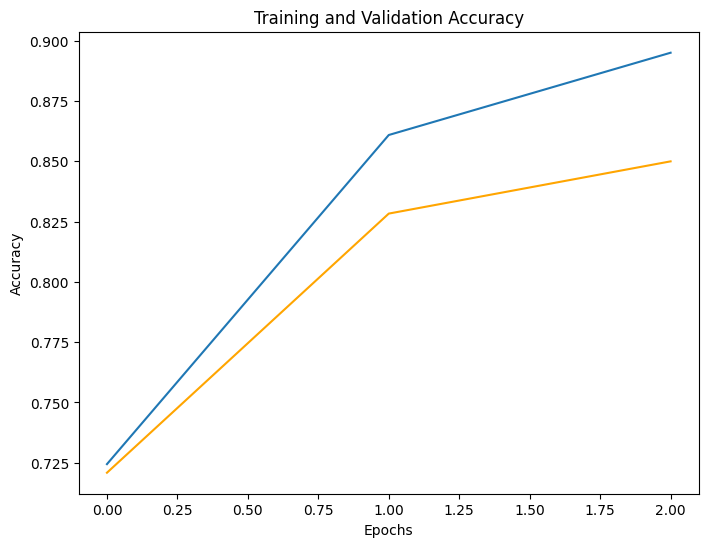

5033 1258


Epoch 1/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.936476396968407e-05]
Epoch 1 Loss: 2.4037311108907065 Train Accuracy: 0.73             Validation Accuracy: 0.6783333333333333
Global gradient norm: 5.427894962819575


Epoch 2/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.57666351956958e-05]
Epoch 2 Loss: 1.621811116139094 Train Accuracy: 0.8755333333333334             Validation Accuracy: 0.825
Global gradient norm: 4.402269373492734


Epoch 3/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [2.8866422562400154e-09]
Epoch 3 Loss: 1.4471041746934254 Train Accuracy: 0.9008             Validation Accuracy: 0.8458333333333333
Global gradient norm: 3.459245592788683
End of Training for swin Model 2-fold
best accuracy: 0.8458333333333333


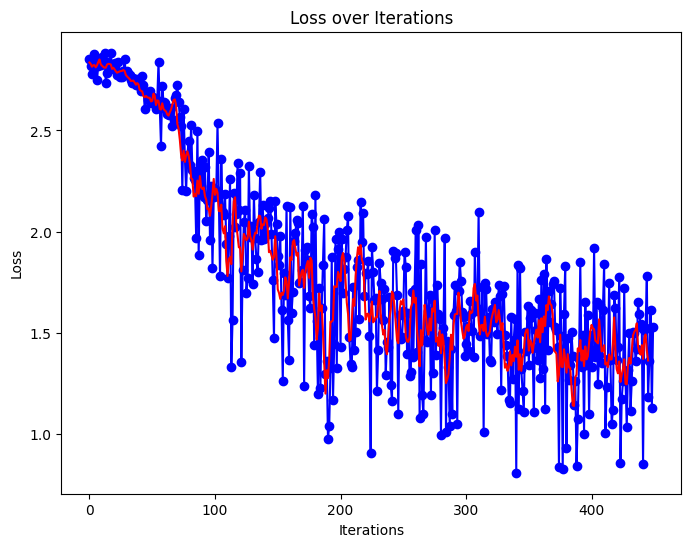

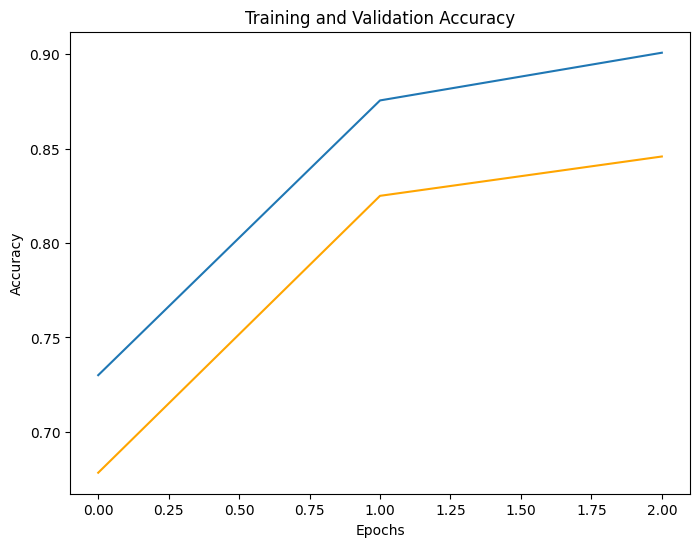

5033 1258


Epoch 1/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [9.936476396968407e-05]
Epoch 1 Loss: 2.3979848059018454 Train Accuracy: 0.7358             Validation Accuracy: 0.7258333333333333
Global gradient norm: 6.752543163377402


Epoch 2/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [4.57666351956958e-05]
Epoch 2 Loss: 1.6869304104646048 Train Accuracy: 0.8656             Validation Accuracy: 0.8058333333333333
Global gradient norm: 2.7448612372372523


Epoch 3/3:   0%|          | 0/150 [00:00<?, ?it/s]

Learning Rate: [2.8866422562400154e-09]
Epoch 3 Loss: 1.4770620671908061 Train Accuracy: 0.8988             Validation Accuracy: 0.8325
Global gradient norm: 3.196575400251101
End of Training for swin Model 3-fold
best accuracy: 0.8325


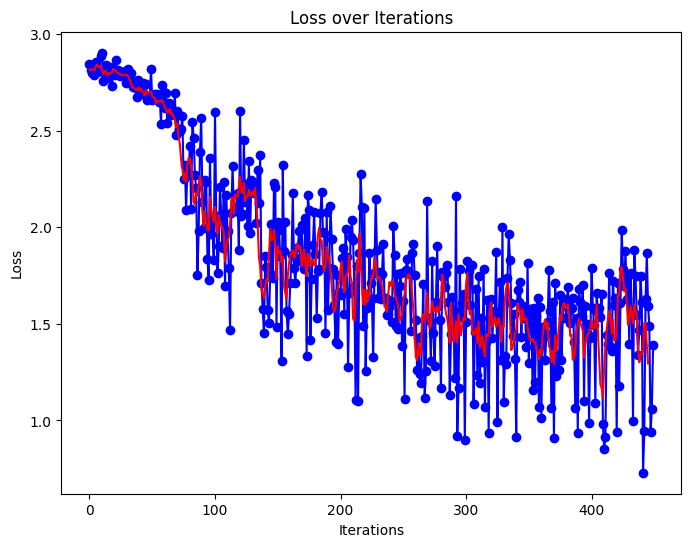

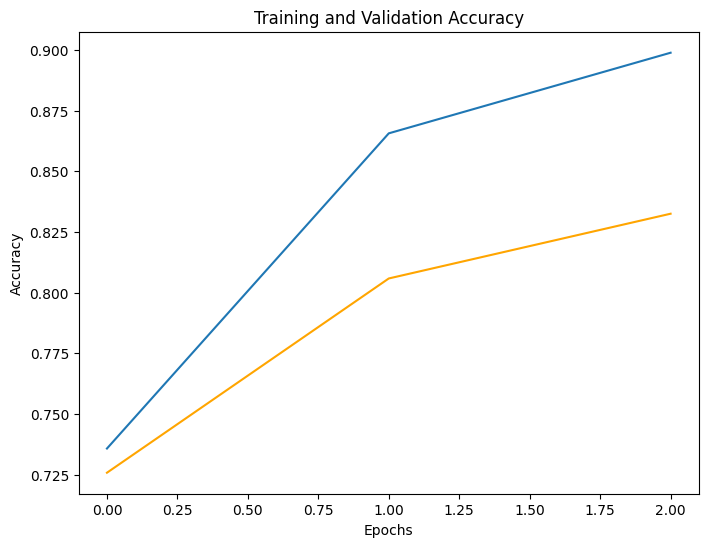

5033 1258


Epoch 1/3:   0%|          | 0/150 [00:00<?, ?it/s]

In [ ]:
k_fold = StratifiedKFold(n_splits=5, random_state=SEED, shuffle=True)
models = ['maxvit','swin' ]

# N=100
# perm_indices = np.random.permutation(N)
# X = X[perm_indices]
# y = y[perm_indices]

for model_name in models:
    current_model_accuracies = []
    for k_id, (train_i, val_i) in enumerate(k_fold.split(X,y)):
        if k_id in [0,1] and model_name == 'maxvit':
            continue
        print(len(train_i), len(val_i))
        train_set = X[train_i]
        train_label_set = y[train_i]

        val_set = X[val_i]
        val_label_set = y[val_i]

        model_config = config_manager.config[model_name]
        lr = config_manager.config.lr
        num_epochs = config_manager.config.num_epochs
        num_classes = config_manager.config.num_classes

        device = 'cuda' if torch.cuda.is_available() else 'cpu'

        train_transform = create_train_transforms()
        test_transform = create_test_transforms()

        train_data = PastaData(train_set, train_label_set, transform_list=train_transform)
        val_data = PastaData(val_set, val_label_set, transform_list=test_transform)

        train_loader = DataLoader(train_data, batch_size=model_config.batch_size, shuffle=False, drop_last=True)
        val_loader = DataLoader(val_data, batch_size=model_config.batch_size, shuffle=False, drop_last=True)

        model = create_model(model_name, num_classes)
        model.to(device)

        result_dir = os.path.join(GOOGLE_DRIVE_PATH, model_config.output_dir)
        os.makedirs(result_dir, exist_ok=True)

        out_file = os.path.join(result_dir, f"{model_name}_k_fold_{k_id}.pt")

        resume = False
        if os.path.exists(out_file):
            print(f"=== {out_file} exist! ===")
            resume = True

        #  need to make dataframe from images
        loss_history, train_accuracy_history, \
        val_accuracy_history, best_accuracy, model, optimizer, scaler, end_epoch = trainer(
            model,
            train_loader,
            val_loader,
            num_epochs=num_epochs,
            lr=lr,
            model_config=model_config,
            device=device,
            resume=resume,
            out_file=out_file,
            num_classes=num_classes
        )


        current_model_accuracies.append(best_accuracy)
        print(f"End of Training for {model_name} Model {k_id}-fold")
        print(f"best accuracy: {best_accuracy}")

        save_model(model, optimizer, scaler, end_epoch, out_file)
        # torch.save(best_params, os.path.join(result_dir, f"{model_name}_k_fold_{k_id}.pt"))
        draw_loss(loss_history)
        draw_train_val_accuracy(train_accuracy_history, val_accuracy_history)


    print("current_model_accuracies", current_model_accuracies)


        # avg_accuracy = torch.mean(fold_accuracies)
        # std_accuracy = torch.std(fold_accuracies)

        # general plan
        # 1. save best accuracies
        # 2. compare with different models
        # 3. train on full dataset with best performing model
        # 4. make inference


In [ ]:
# Inference

In [ ]:
!git pull
!git config --global user.email "tomhyhan@gmail.com"
!git config --global user.name username
!git add .
!git status
!git commit -m "updated trainer"
!git push https://{token}@github.com/{username}/{repo_name}.git